In [807]:
import sqlite3
import pandas as pd
import datetime
import re
from collections import Counter
import seaborn as sns
import numeritos as nitos
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [808]:
pd.set_option('max_colwidth', None)

In [809]:
connection = sqlite3.connect("../data/twitter.db")
crsr = connection.cursor()

In [810]:
df_tweets = pd.read_sql('SELECT * FROM tweets', connection, parse_dates=['created_at'])
df_users = pd.read_sql('SELECT * FROM users', connection)

In [811]:
df_tweets.head()

,id,text,author_id,created_at,retweet_count,reply_count,like_count,quote_count
0,1578613094191796224,"Gente muy agradable en @TheBridge_Tech , te ries mucho en el dia a dia. El tema es que pasas tanto tiempo trabajando aqui, que te quita la libido y tu vida sexual se va a la mierda, jjj. Tengo ganas de terminar mi Bootcamp para poder hacer una buena sesión de Shibari",1578095844569514011,2022-10-08 05:07:45,0,0,0,0
1,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",1003872445,2022-10-04 16:27:23,2,0,12,0
2,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2529499620,2022-10-03 11:52:25,3,0,3,0
3,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!,706520411551494145,2022-10-03 08:48:29,0,0,1,0
4,1575217357105946624,Hoy por fin ve la luz mi primer Case Study público. Un trabajo intensivo de fin de bootcamp realizado con un cliente real @emancipaTIC y dos semanas para que las 5 verticales en @TheBridge_Tech hiciésemos realidad un MVP. Os invito a verlo y dar feedback. https://t.co/rkCjxulYS9 https://t.co/PqM0dvxj3X,604485175,2022-09-28 20:14:18,3,0,4,0


In [812]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             154 non-null    object        
 1   text           154 non-null    object        
 2   author_id      154 non-null    object        
 3   created_at     154 non-null    datetime64[ns]
 4   retweet_count  154 non-null    int64         
 5   reply_count    154 non-null    int64         
 6   like_count     154 non-null    int64         
 7   quote_count    154 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 9.8+ KB


In [813]:
df_users.head()

,id,name,username
0,1578095844569514011,Rocket,75_Rocket_
1,1003872445,Pau Mugarra,PauMugarra
2,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3
3,706520411551494145,JoseSola,Jose_Sola_
4,604485175,Berta Otero,bertinha84


In [814]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        82 non-null     object
 1   name      82 non-null     object
 2   username  82 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [815]:
print('The Bridge school has been mentioned a total of ' + str(len(df_tweets)) + ' times since 13th of June.')

The Bridge school has been mentioned a total of 154 times since 13th of June.


In [816]:
# The column social_repercussion contains the sum of the 4 metrics columns
df_tweets['total_interactions'] = df_tweets['retweet_count'] + df_tweets['reply_count'] + df_tweets['like_count'] + df_tweets['quote_count']

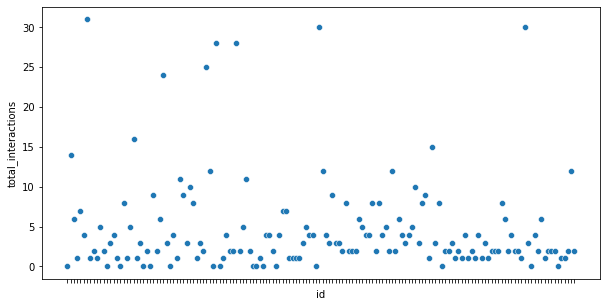

In [817]:
def scatterplot(x, y, df):
    plt.figure(figsize=(10,5))
    plot = sns.scatterplot(x=x,y=y,data=df);
    plot.set(xticklabels=[]) 
    plt.show()

scatterplot('id', 'total_interactions', df_tweets)

In [818]:
def get_values(df, feature):
    return df[feature].values

def get_usernames(user_df, df):
    id = df['author_id'].values
    return [user_df[user_df['id'] == elem]['name'].values[0] for elem in id]

def most_repeated_value(df, feature):
    return df[feature].value_counts().idxmax()

def count_repetiton_times(df, feature):
    id = get_values(df, feature)
    return [df[feature].value_counts()[elem] for elem in id]

def get_dates(df):
    dates = get_values(df, 'created_at')
    dates_mod = [pd.to_datetime(str(date)) for date in dates]
    return [ts.strftime('%Y.%m.%d') for ts in dates_mod]

def get_dict(user_df, df):
    return {'Text': get_values(df, 'text'),
            'Author name': get_usernames(user_df, df),
            'Date': get_dates(df),
            'Total interactions' : get_values(df, 'total_interactions'),
            'Retweet count': get_values(df, 'retweet_count'),
            'Reply count': get_values(df, 'reply_count'),
            'Like count': get_values(df, 'like_count'),
            'Quote count': get_values(df, 'quote_count'),
            'Total posts': count_repetiton_times(df, 'author_id')}

def get_df(user_df, df):    
    return pd.DataFrame.from_dict(get_dict(user_df, df))

In [819]:
df_max_interaction = df_tweets[df_tweets['total_interactions']==df_tweets['total_interactions'].max()]

max_interactions_tweet = get_df(df_users, df_max_interaction)

max_interactions_tweet

,Text,Author name,Date,Total interactions,Retweet count,Reply count,Like count,Quote count,Total posts
0,Y seguimos con lo prometido: Primera quedada de la comunidad #CPS en Madrid 🚀: https://t.co/xnWjKu6fPi en un espacio cedido por @TheBridge_Tech.,Pau Mugarra,2022.09.23,31,7,0,20,4,1


In [820]:
df_max_interaction_mult = df_tweets.loc[df_tweets['total_interactions'] >= 20]

max_interactions_tweets = get_df(df_users, df_max_interaction_mult)

max_interactions_tweets

,Text,Author name,Date,Total interactions,Retweet count,Reply count,Like count,Quote count,Total posts
0,Y seguimos con lo prometido: Primera quedada de la comunidad #CPS en Madrid 🚀: https://t.co/xnWjKu6fPi en un espacio cedido por @TheBridge_Tech.,Pau Mugarra,2022.09.23,31,7,0,20,4,1
1,"¿Quieres impulsar tu perfil profesional en el ámbito digital? 🔥¡Descubre los #bootcamps de @ENCamaraSevilla y @TheBridge_Tech y despega en el sector tecnológico! 🚀La formación más innovadora en #DesarrolloWeb #FullStack, #DataScience y #Ciberseguridad: https://t.co/dI7Go0yJsW https://t.co/598NsYg0Ud",Cámara de Comercio de Sevilla,2022.08.31,24,11,0,13,0,1
2,"Comienza la masterclass en @TheBridge_Tech de @uriondo hablando de cómo evitar ser #Periodista?!?! En serio?!?! jajaja con lo que mola el curso de @JotDownSpain, verdad @imparsifal? https://t.co/EFVSpRN56s",Loretogf,2022.07.28,25,6,2,16,1,1
3,El próximo jueves 28 estaremos em @TheBridge_Tech con @uriondo que impartirá la masterclass «Evita el periodismo: una oda a la profesión». La asistencia es gratuita hasta completar aforo. Os esperamos. https://t.co/mHGMocUoP2,Jot Down Magazine,2022.07.24,28,10,0,15,3,1
4,Esto me hace ilusión. El jueves a las 19 en @TheBridge_Tech hablaré de la profesión que amo y que ejercí locamente durante 20 años para el Programa superior de emprendimiento en periodismo de @JotDownSpain. Elige ¿streaming o aire acondicionado? https://t.co/yCk9MxVa0I,Miguel Ángel Uriondo,2022.07.19,28,7,1,17,3,1
5,El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/z7hOVln8Bp,Heavy Mental,2022.06.29,30,3,2,22,3,2
6,"🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30pm en nuestro evento en directo en MADRID en @TheBridge_Tech 🚨Para los que no vayáis, TRANQUILOS, seguramente el martes lo emitamos para todos vosotros :D https://t.co/fqaYsbyxl7",Heavy Mental,2022.06.26,30,6,6,17,1,2


In [821]:
# User with most tweets
most_active_user_df = df_users[df_users['id'] == most_repeated_value(df_tweets, 'author_id')]

most_active_user_df

,id,name,username
48,1255794072280842240,Heavy Mental,HeavyMental_es


In [822]:
tweets_by_most_active_user = df_tweets[df_tweets['author_id'] == most_repeated_value(df_tweets, 'author_id')]

tweets_by_most_active_user = get_df(df_users, tweets_by_most_active_user)

tweets_by_most_active_user

,Text,Author name,Date,Total interactions,Retweet count,Reply count,Like count,Quote count,Total posts
0,@carlosmdh @UbaldoHervas @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Yes!! ;) ;),Heavy Mental,2022.06.29,4,0,1,3,0,12
1,El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/z7hOVln8Bp,Heavy Mental,2022.06.29,30,3,2,22,3,12
2,@Mulder01198676 @PauMugarra @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Sí a todo,Heavy Mental,2022.06.28,2,0,1,1,0,12
3,@Bombabarros @Mulder01198676 @_miki @Recuenco @DavidAlayon @GuillermoDeHaro @moquintana @TheBridge_Tech Gracias por venir y buen viaje de vuelta… eres top!!,Heavy Mental,2022.06.27,3,0,0,3,0,12
4,@vmcasamayor @TheBridge_Tech @Recuenco @Alienta 🙄 @TheBridge_Tech,Heavy Mental,2022.06.27,1,0,0,1,0,12
5,"@joobid @TheBridge_Tech @Recuenco @GuillermoDeHaro Si claro, Miki no tiene otra cosa que hacer",Heavy Mental,2022.06.27,2,0,1,1,0,12
6,"@jatorrero @TheBridge_Tech Juan Antonio, te mandamos dm para que te vengas que hay hueco!",Heavy Mental,2022.06.27,3,0,1,2,0,12
7,@navarro_batista @TheBridge_Tech En orbyt ya si eso.,Heavy Mental,2022.06.27,2,0,1,1,0,12
8,"@CarlosLGonzalez @TheBridge_Tech Yes, seguramente martes a la misma hora en todos lados :)",Heavy Mental,2022.06.26,2,0,0,2,0,12
9,"@CarlosLGonzalez @TheBridge_Tech Sí, vida real se llama.",Heavy Mental,2022.06.26,2,0,1,1,0,12


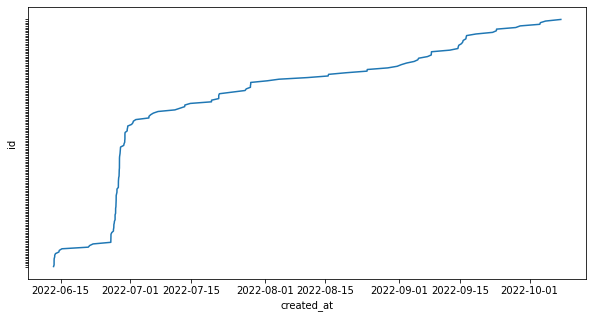

In [823]:
def lineplot(x, y, df):
    plt.figure(figsize=(10,5))
    plot = sns.lineplot(data=df, x=x, y=y)
    plot.set(yticklabels=[]) 
    plt.show()

lineplot('created_at', 'id', df_tweets)

In [824]:
month_with_most_tweets = df_tweets['created_at'].dt.month.value_counts().idxmax()

datetime_object = datetime.datetime.strptime(str(month_with_most_tweets), "%m")

month_name = datetime_object.strftime("%B")

print(month_name)

June


In [825]:
print('Most of the tweets were done in', month_name)

Most of the tweets were done in June


In [826]:
df_tweets_month = df_tweets.copy()
df_tweets_month['month'] = df_tweets_month['created_at'].dt.month

In [827]:
df_tweets_month_text = df_tweets_month.groupby(['month']).count()
df_tweets_month_text['text']

month
6     88
7     27
8     10
9     25
10     4
Name: text, dtype: int64

In [828]:
df_tweets_month_intractions = df_tweets_month.groupby(['month']).sum()
df_tweets_month_intractions['tweet_count'] = df_tweets_month_text['text']
df_tweets_month_intractions

,retweet_count,reply_count,like_count,quote_count,total_interactions,tweet_count
month,,,,,,
6,29,47,292,9,377,88
7,40,8,92,10,150,27
8,31,0,40,2,73,10
9,23,8,76,7,114,25
10,5,0,16,0,21,4


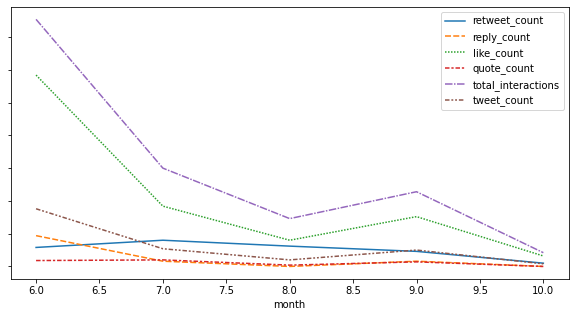

In [829]:
def lineplot_mult(df):
    plt.figure(figsize=(10,5))
    plot = sns.lineplot(data=df)
    plot.set(yticklabels=[]) 
    plt.show()

lineplot_mult(df_tweets_month_intractions)

In [830]:
Counter(" ".join(df_tweets["text"]).split()).most_common(100)

[('de', 172),
 ('@TheBridge_Tech', 135),
 ('en', 92),
 ('la', 85),
 ('y', 66),
 ('@HeavyMental_es', 65),
 ('el', 63),
 ('a', 62),
 ('que', 53),
 ('@GuillermoDeHaro', 51),
 ('@Recuenco', 50),
 ('para', 39),
 ('@_miki', 32),
 ('@DavidAlayon', 30),
 ('por', 28),
 ('un', 26),
 ('con', 25),
 ('las', 22),
 ('del', 21),
 ('se', 19),
 ('una', 18),
 ('no', 18),
 ('los', 17),
 ('es', 15),
 ('lo', 13),
 ('nos', 12),
 ('@Mulder01198676', 12),
 ('más', 11),
 ('pero', 10),
 ('@Alienta', 10),
 ('te', 9),
 ('El', 9),
 ('al', 9),
 ('talento', 9),
 ('convenio', 9),
 ('formación', 9),
 ('@uriondo', 9),
 ('primera', 8),
 ('@TheBridge_Tech,', 8),
 ('si', 8),
 ('La', 8),
 ('ya', 8),
 ('@JotDownSpain', 8),
 ('vida', 7),
 ('Si', 7),
 ('gracias', 7),
 ('ha', 7),
 ('sobre', 7),
 ('sus', 7),
 ('the', 7),
 ('Gracias', 7),
 ('@moquintana', 7),
 ('Hoy', 6),
 ('o', 6),
 ('Y', 6),
 ('entre', 6),
 ('and', 6),
 ('profesionales', 6),
 ('#ciberseguridad', 6),
 ('No', 6),
 ('@PauMugarra', 6),
 ('va', 5),
 ('hacer', 5),
 (

In [831]:
def remove_links(text):
    return " ".join([' ' if ('http') in word else word for word in text.split()])

df_tweets['text_mod'] = df_tweets['text'].apply(lambda x: remove_links(x))

In [832]:
def remove_stopwords(text, language):
    stop = stopwords.words(language)
    return ' '.join([word for word in text.split() if word not in (stop)])

df_tweets['text_mod'] = df_tweets['text_mod'].apply(lambda x: remove_stopwords(x, 'spanish'))

In [833]:
def remove_mentions(text):
    return re.sub(r"\@\w+[,]|\@\w+|[,]\@\w+", " ", text)

df_tweets['text_mod'] = df_tweets['text_mod'].apply(lambda x: remove_mentions(x))

In [834]:
def signs_tweets(text, signs):
    return signs.sub(' ', text.lower())

signs = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\¡)")

df_tweets['text_mod'] = df_tweets['text_mod'].apply(lambda x: signs_tweets(x, signs))

In [835]:
def remove_hash(text):
    return re.sub(r"\#\w+[,]|\#\w+|[,]\#\w+", " ", text)

df_tweets['text_mod'] = df_tweets['text_mod'].apply(lambda x: remove_hash(x))

In [836]:
def remove_aux_words(text, articles):
  return articles.sub(' ', text.lower())

articles = re.compile('\s+(la|el|y|the|and|que|si|no|.|#)(\s+)')

df_tweets['text_mod'] = df_tweets['text_mod'].apply(lambda x: remove_aux_words(x, articles))

In [837]:
df_tweets['text_mod'] = df_tweets['text_mod'].apply(lambda x: nitos.clean_emoji(x))

In [838]:
df_tweets

,id,text,author_id,created_at,retweet_count,reply_count,like_count,quote_count,total_interactions,text_mod
0,1578613094191796224,"Gente muy agradable en @TheBridge_Tech , te ries mucho en el dia a dia. El tema es que pasas tanto tiempo trabajando aqui, que te quita la libido y tu vida sexual se va a la mierda, jjj. Tengo ganas de terminar mi Bootcamp para poder hacer una buena sesión de Shibari",1578095844569514011,2022-10-08 05:07:45,0,0,0,0,0,gente agradable ries dia dia tema pasas tiempo trabajando aqui quita libido vida sexual va mierda jjj tengo ganas terminar bootcamp poder hacer buena sesión shibari
1,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",1003872445,2022-10-04 16:27:23,2,0,12,0,14,recordaros semana viene primera quedada madrid gran suerte contar dé charla las plazas agotado podéis apuntar grupo próximas quedadas
2,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2529499620,2022-10-03 11:52:25,3,0,3,0,6,el desarrollador web perfiles demandados mercado laboral descubre desarrollo web full stack mano toda información aquí
3,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!,706520411551494145,2022-10-03 08:48:29,0,0,1,0,1,enhorabuena crack
4,1575217357105946624,Hoy por fin ve la luz mi primer Case Study público. Un trabajo intensivo de fin de bootcamp realizado con un cliente real @emancipaTIC y dos semanas para que las 5 verticales en @TheBridge_Tech hiciésemos realidad un MVP. Os invito a verlo y dar feedback. https://t.co/rkCjxulYS9 https://t.co/PqM0dvxj3X,604485175,2022-09-28 20:14:18,3,0,4,0,7,hoy fin ve luz primer case study público un trabajo intensivo fin bootcamp realizado cliente real dos semanas verticales hiciésemos realidad mvp os invito verlo dar feedback
...,...,...,...,...,...,...,...,...,...,...
149,1536313018321190912,Lo conseguí!!! Gracias @TheBridge_Tech @HeavyMental_es https://t.co/SOccLkT3dG,18955785,2022-06-13 11:42:21,0,0,1,0,1,lo conseguí gracias
150,1536311923423203331,@TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo! Que buena forma de empezar la semana.,15521945,2022-06-13 11:38:00,0,0,1,0,1,yo buena forma empezar semana
151,1536310998319210496,@TheBridge_Tech @HeavyMental_es @Alienta ¡La tengo!,10614452,2022-06-13 11:34:19,0,0,2,0,2,tengo
152,1536310702876549123,Lo prometimos y han llegado gracias a @TheBridge_Tech ... últimas entradas para el podcast 27 en directo :D cc @Atorrerus @Mulder01198676 @joansabater @PesetJairo @pelayoarbues @adriskou @estodopornada https://t.co/Aygpl489sQ,1255794072280842240,2022-06-13 11:33:09,2,4,6,0,12,lo prometimos llegado gracias últimas entradas podcast directo cc


In [839]:
most_repeated = Counter(" ".join(df_tweets["text_mod"]).split()).most_common(100)

most_repeated = most_repeated[:10]

df = pd.DataFrame(most_repeated, columns =['Word', 'Times'])

df

,Word,Times
0,gracias,15
1,talento,14
2,primera,11
3,hoy,10
4,formación,10
5,vida,9
6,convenio,9
7,colaboración,8
8,digital,8
9,bootcamp,7


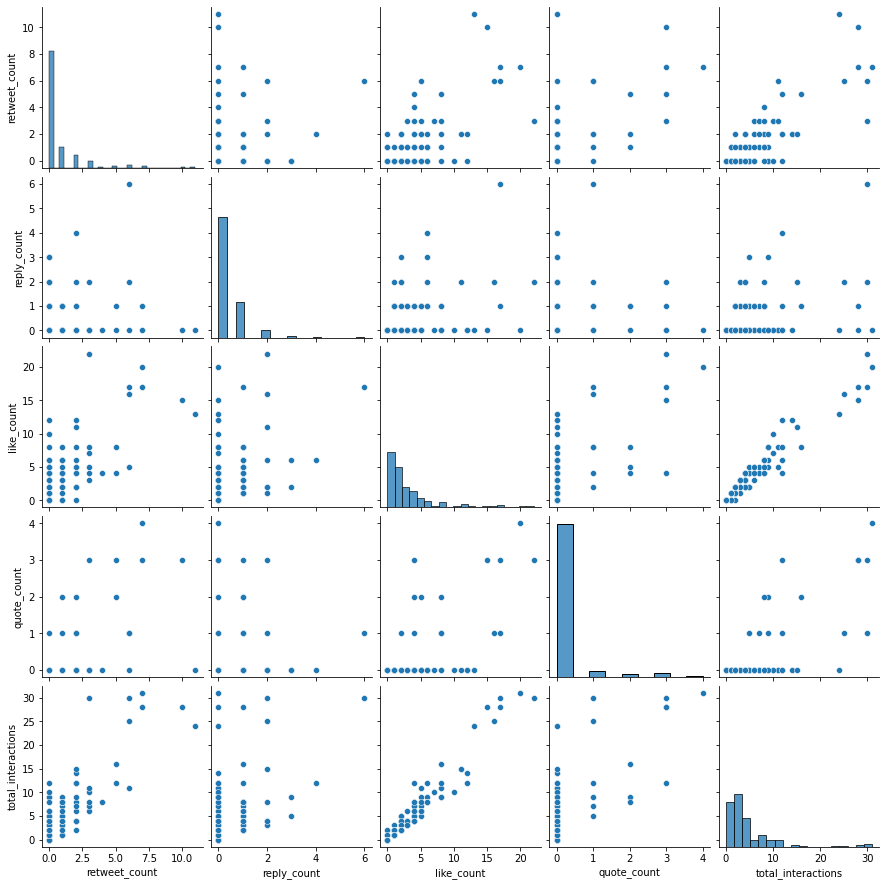

In [840]:
sns.pairplot(df_tweets)

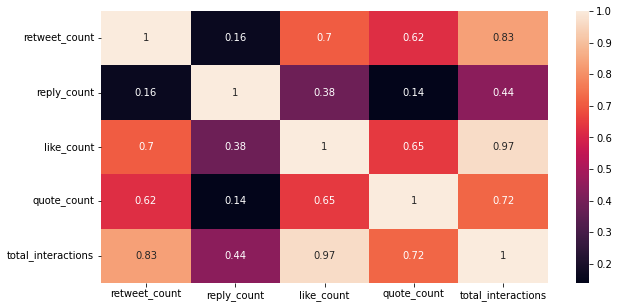

In [841]:
def heatmap(df):
    plt.figure(figsize=(10,5))
    plot = sns.heatmap(df.corr(), annot=True)
    plt.show()

heatmap(df_tweets)

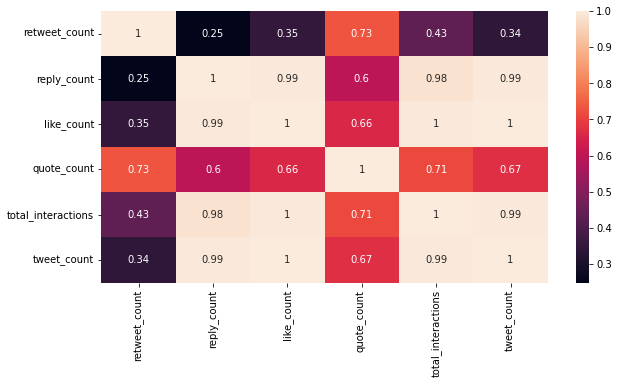

In [842]:
heatmap(df_tweets_month_intractions)